# **Scraping**

Web scraping is gathering data through the http request made through your program.
<br>Note: this project might depending upon the availabilty of "Most anticipated movies" section on the IMDb page in your region.

Prerequisite:
1. html
2. pyhton

Documentations:
1. requests-https://pypi.org/project/requests/
2. BeautifulSoup-https://www.crummy.com/software/BeautifulSoup/bs4/doc/
3. pandas-https://pandas.pydata.org/pandas-docs/stable/
4. pyplot-https://matplotlib.org/api/pyplot_api.html

# **INTRODUCTION**

This is a web scraping project<br>
I get the real time data from IMDb.com about the most anticipated movies and their public hype %.

Step 1 : Importing  relevant modules<br><br>

In [85]:
#import dependencies/packages to perform the actions we need to do

import requests #to make request to the webpage we use this package
from bs4 import BeautifulSoup as soup #to parse through the web page content tag by tag
import pandas as pd # to make a dataframe
import matplotlib.pyplot as plt #for visualization
import random

Step 2 : requesting the website through the get function from requests

In [86]:
#accessing the web page 
url_copy = "https://www.imdb.com/"
client = requests.get(url_copy)
html_code = client.text
#remember to close the connection after reading the data
client.close()

Side by side job<br>
inspect the page that is being scraped to get the classes or ids of the elements you need to retrieve
<br>![IMDb](https://radacad.com/wp-content/uploads/2019/08/2019-08-01_14h43_05.png)

Step 3 : Getting relevant data through the findall function from beautifulSoup and saving it in a csv file

In [87]:
with open('imdb.csv','w') as csv_file:
        scraped = soup(html_code, "html.parser")
        container = scraped.findAll(class_="trending-list-rank-item")
        csv_file.write("Title"+","+'% popularity'+"\n")
        for i in range(len(container)-1,-1,-1):
                #scraping name and %popularity from the database
                element=container[i]
                name=element.find(class_='trending-list-rank-item-name').text
                #name=name.split()
                share=element.find(class_='trending-list-rank-item-share').text
                share=share[0:len(share)-1]
                csv_file.write(name+","+share+"\n")


Step 4 : putting the relevant data in a dataframe and then plot it using plot function

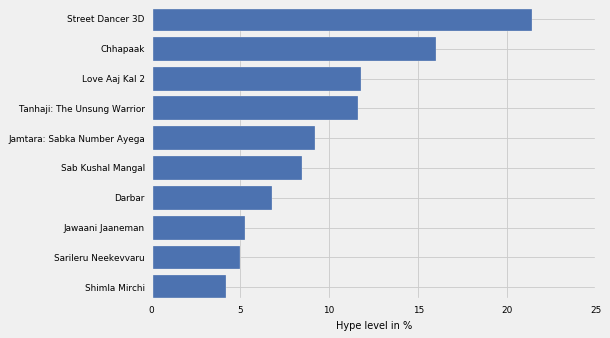

In [102]:
df=pd.read_csv('imdb.csv')
plt.style.use(random.choice(plt.style.available))
plt.barh(df['Title'],df['% popularity'],)
plt.xlabel("Hype level in %")

plt.show()

Result : A horizontal bar graph showing the upcoming movies and their popularity ratings